In [33]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

1. Apply Hough transform (circular objects detection) and blob detection algorithm to detect coins present in image 'coins_1.jfif'. Comment on the outcomes of two methods.

In [34]:
#Hough transform

img = cv.imread("coins_1.jfif")

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = cv.GaussianBlur(gray, (7, 7), 1.5)

# hough circle transform
row = gray.shape[0]
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, row/8, param1 = 150,
                        param2 = 25)

# plot all the circles
if circles is not None:
    circles = np.uint8(np.around(circles))
    for i in circles[0]:
        # draw circles center
        center = (i[0], i[1])
        cv.circle(img, center, 1, (100, 100, 255), 3)
        # draw the circle 
        radius = i[2]
        cv.circle(img, center, radius, (0, 255, 0), 2)
        
cv.imshow("hough circle transform", img)
cv.waitKey()

-1

In [35]:
#Blob detection

img = cv.imread('coins_1.jfif')
blur = cv.GaussianBlur(img, (7, 7), 0)
gray = cv.cvtColor(blur, cv.COLOR_BGR2GRAY)

params = cv.SimpleBlobDetector_Params()


params.filterByArea = True
params.minArea = 150
params.maxArea = 2000
params.filterByColor = False

# create object detector
detector = cv.SimpleBlobDetector_create(params)
keypoints = detector.detect(gray)

# draw keypoints
im_with_keypoints = cv.drawKeypoints(img, keypoints, np.zeros((1, 1)), (0, 0, 255), 
                                    cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv.imshow('blobs', im_with_keypoints)
cv.waitKey(0)


-1

Comment on the outcome:

Hough transform will detect the center point of the circle and the outline of the circle at the same time

Blob detection algorithm only detect the outline of the circle

2. Apply k-means clustering on 'zebra.jfif' to segment out the zebra.

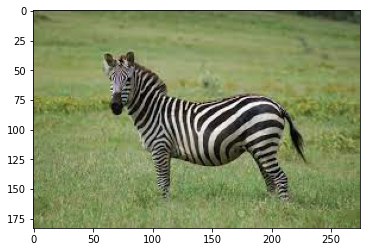

In [36]:
img = cv.imread('zebra.jfif')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.figure()
plt.imshow(img_rgb)
plt.show()

In [37]:
# reshape 
img_reshape = img_rgb.reshape((-1, 3))
img_reshape = np.float32(img_reshape)


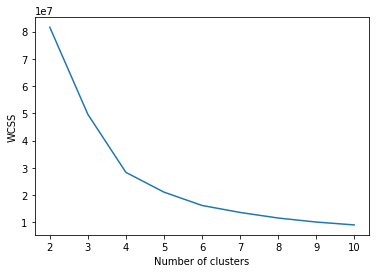

In [38]:
WithinClusterSumOfSquares = [] 
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
attempts = 10

for k in range(2, 11): 
    ret, label, center = cv.kmeans(img_reshape, k, None, criteria, attempts, cv.KMEANS_PP_CENTERS)
    WithinClusterSumOfSquares.append(ret)

plt.plot(range(2, 11), WithinClusterSumOfSquares)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

optimal k = 4

In [39]:
img.shape

(183, 275, 3)

In [40]:
183 * 275

50325

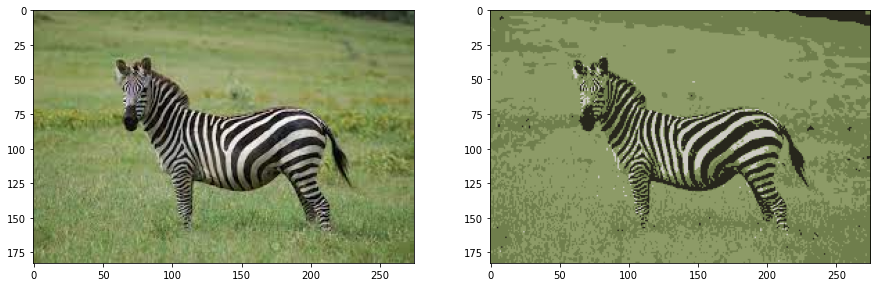

In [41]:
# k-means clustering
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
attempts = 10
ret, label, center = cv.kmeans(img_reshape, K, None, criteria, attempts, cv.KMEANS_PP_CENTERS)

# reshape into original dimensions
center = np.uint8(center)
res = center[label.flatten()]
result = res.reshape(img_rgb.shape)

plt.figure(figsize = (15, 15))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

In [42]:
from numpy import linalg as LN
white = (255, 255, 255)
Idx_min_white = np.argmin(LN.norm(center-white, axis = 1))

black = (0, 0, 0)
Idx_min_black = np.argmin(LN.norm(center-black, axis = 1))

In [43]:
center[1]

array([39, 38, 28], dtype=uint8)

In [44]:
Idx_min_white

2

In [45]:
Idx_min_black

1

In [46]:
mask_white = result == center[Idx_min_white]

mask_black = result == center[Idx_min_black]

mask = cv.bitwise_or(np.float32(mask_white), np.float32(mask_black))
seg_img = img*(mask.astype("uint8"))

cv.imshow('segmentation', seg_img)
cv.waitKey(0)

-1

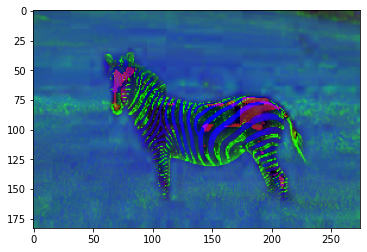

In [47]:
#HSV color space
img = cv.imread('zebra.jfif')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2HSV)

plt.figure()
plt.imshow(img_rgb)
plt.show()

In [48]:
# reshape 
img_reshape = img_rgb.reshape((-1, 3))
img_reshape = np.float32(img_reshape)

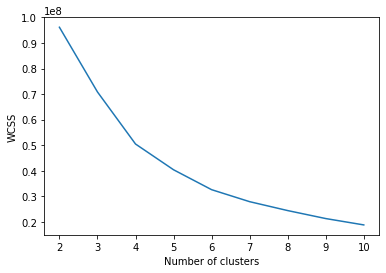

In [49]:
WithinClusterSumOfSquares = [] 
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
attempts = 10

for k in range(2, 11): 
    ret, label, center = cv.kmeans(img_reshape, k, None, criteria, attempts, cv.KMEANS_PP_CENTERS)
    WithinClusterSumOfSquares.append(ret)

plt.plot(range(2, 11), WithinClusterSumOfSquares)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

optimal k = 4

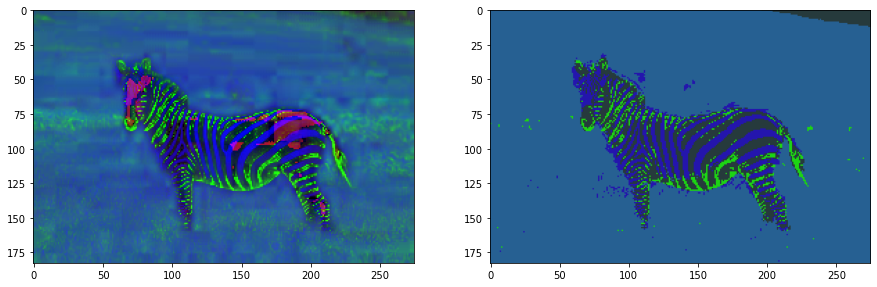

In [50]:
# k-means clustering
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
attempts = 10
ret, label, center = cv.kmeans(img_reshape, K, None, criteria, attempts, cv.KMEANS_PP_CENTERS)

# reshape into original dimensions
center = np.uint8(center)
res = center[label.flatten()]
result = res.reshape(img_rgb.shape)

plt.figure(figsize = (15, 15))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

In [51]:
from numpy import linalg as LN
white = (0, 0, 0)
Idx_min = np.argmin(LN.norm(center-white, axis = 1))


In [52]:
center[1]

array([ 38,  96, 146], dtype=uint8)

In [53]:
Idx_min

0

In [54]:
mask = result == center[Idx_min]
seg_img = img*(mask.astype("uint8"))

display = cv.cvtColor(seg_img, cv.COLOR_HSV2BGR)
cv.imshow('segmentation', display)
cv.waitKey(0)

-1

Compare the result
RGB color space - black and white segmentation
HSV  color space - greenish segmentation